In [ ]:

import kagglehub
kumarajarshi_life_expectancy_who_path = kagglehub.dataset_download('kumarajarshi/life-expectancy-who')

print('Data source import complete.')


Using Colab cache for faster access to the 'life-expectancy-who' dataset.
Data source import complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

file = '/kaggle/input/life-expectancy-who/Life Expectancy Data.csv'
data = pd.read_csv(file)

print("Initial Data :")
print(data.head())


Initial Data (first 7 columns):
       Country  Year      Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years   thinness 5-9 years  Income composition of resources  Schooling
0  Afghanistan  2015  Developing              65.0            263.0             62     0.01               71.279624         65.0      1154   19.1                  83    6.0               8.16         65.0        0.1  584.259210  33736494.0                   17.2                 17.3                            0.479       10.1
1  Afghanistan  2014  Developing              59.9            271.0             64     0.01               73.523582         62.0       492   18.6                  86   58.0               8.18         62.0        0.1  612.696514    327582.0                   17.5                 17.5                            0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:

target = "Life expectancy "


print("\n================ BEFORE CLEANING ================")
for col in data.columns:
    missing_count = 0
    col_idx = data.columns.get_loc(col)
    for row_idx in range(len(data)):
        if pd.isna(data.iat[row_idx, col_idx]):
            missing_count += 1
    print(f"{col}: {missing_count} missing")


data_cleaned_rows = []
target_idx = data.columns.get_loc(target)

for row_idx in range(len(data)):
    val = data.iat[row_idx, target_idx]
    if not pd.isna(val):
        data_cleaned_rows.append(data.iloc[row_idx])

data_cleaned = pd.DataFrame(data_cleaned_rows).reset_index(drop=True)


features = []
for col in data_cleaned.columns:
    if col != target:
        features.append(col)

X = data_cleaned[features].copy()
y = data_cleaned[target].copy()


numeric_cols = []
cat_cols = []

for col in X.columns:
    dtype = X[col].dtype
    if dtype == "float64" or dtype == "int64":
        numeric_cols.append(col)
    elif dtype == "object":
        cat_cols.append(col)


for col in numeric_cols:
    col_idx = X.columns.get_loc(col)

    total = 0.0
    count = 0
    for row_idx in range(len(X)):
        val = X.iat[row_idx, col_idx]
        if not pd.isna(val):
            total += float(val)
            count += 1
    mean_val = total / count if count > 0 else 0.0

    # Fill missing and round all values
    for row_idx in range(len(X)):
        val = X.iat[row_idx, col_idx]
        if pd.isna(val):
            X.iat[row_idx, col_idx] = round(mean_val, 3)
        else:
            X.iat[row_idx, col_idx] = round(float(val), 3)


for col in cat_cols:
    col_idx = X.columns.get_loc(col)

    counts = {}
    for row_idx in range(len(X)):
        val = X.iat[row_idx, col_idx]
        if pd.isna(val):
            continue
        counts[val] = counts.get(val, 0) + 1
    mode_val = max(counts, key=counts.get)

    # Fill missing with mode
    for row_idx in range(len(X)):
        if pd.isna(X.iat[row_idx, col_idx]):
            X.iat[row_idx, col_idx] = mode_val


print("\n================ AFTER CLEANING ================")
for col in X.columns:
    missing_count = 0
    col_idx = X.columns.get_loc(col)
    for row_idx in range(len(X)):
        if pd.isna(X.iat[row_idx, col_idx]):
            missing_count += 1
    print(f"{col}: {missing_count} missing")


pd.set_option('display.float_format', lambda x: f'{x:.3f}')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("\n================ CLEANED DATA PREVIEW ================")
print(X.head())


================ BEFORE CLEANING ================
Country: 0 missing
Year: 0 missing
Status: 0 missing
Life expectancy : 10 missing
Adult Mortality: 10 missing
infant deaths: 0 missing
Alcohol: 194 missing
percentage expenditure: 0 missing
Hepatitis B: 553 missing
Measles : 0 missing
 BMI : 34 missing
under-five deaths : 0 missing
Polio: 19 missing
Total expenditure: 226 missing
Diphtheria : 19 missing
 HIV/AIDS: 0 missing
GDP: 448 missing
Population: 652 missing
 thinness  1-19 years: 34 missing
 thinness 5-9 years: 34 missing
Income composition of resources: 167 missing
Schooling: 163 missing

================ AFTER CLEANING ================
Country: 0 missing
Year: 0 missing
Status: 0 missing
Adult Mortality: 0 missing
infant deaths: 0 missing
Alcohol: 0 missing
percentage expenditure: 0 missing
Hepatitis B: 0 missing
Measles : 0 missing
 BMI : 0 missing
under-five deaths : 0 missing
Polio: 0 missing
Total expenditure: 0 missing
Diphtheria : 0 missing
 HIV/AIDS: 0 missing
GDP: 0 mi

In [ ]:
import math


print("=" * 80)
print("STATISTICAL ANALYSIS - IMPERATIVE VERSION")
print("=" * 80)



numeric_cols = []
for col in X.columns:
    col_idx = X.columns.get_loc(col)

    is_numeric = True
    sample_count = 0

    for row_idx in range(min(10, len(X))):
        val = X.iat[row_idx, col_idx]
        if pd.notna(val):
            try:
                float_val = float(val)
                sample_count += 1
            except:
                is_numeric = False
                break

    if is_numeric and sample_count > 0:
        numeric_cols.append(col)

print(f"Found {len(numeric_cols)} numeric columns")

for col in numeric_cols:
    col_idx = X.columns.get_loc(col)

    values = []
    for i in range(len(X)):
        val = X.iat[i, col_idx]
        if pd.notna(val):
            try:
                values.append(float(val))
            except:
                pass

    if len(values) == 0:
        print(f"{col}: No valid numeric values")
        continue

    # Check if all values are integers
    all_integers = True
    for val in values:
        if val != int(val):
            all_integers = False
            break

    # 1. Calculate MEAN manually
    total = 0.0
    for val in values:
        total += val
    mean_val = total / len(values)

    # 2. Calculate MEDIAN manually
    sorted_vals = sorted(values)
    n = len(sorted_vals)
    if n % 2 == 1:
        median_val = sorted_vals[n // 2]
    else:
        median_val = (sorted_vals[n // 2 - 1] + sorted_vals[n // 2]) / 2

    # 3. Calculate VARIANCE manually
    sum_sq_diff = 0.0
    for val in values:
        sum_sq_diff += (val - mean_val) ** 2
    var_val = sum_sq_diff / len(values)

    # 4. Calculate STANDARD DEVIATION manually
    std_val = math.sqrt(var_val)

    # 5. Calculate MIN and MAX manually
    min_val = values[0]
    max_val = values[0]
    for val in values:
        if val < min_val:
            min_val = val
        if val > max_val:
            max_val = val

    print(f"\n{col}:")
    print(f"  Count:    {len(values)}")
    print(f"  Mean:     {mean_val:.2f}")
    print(f"  Median:   {median_val:.2f}")
    print(f"  Variance: {var_val:.2f}")
    print(f"  Std Dev:  {std_val:.2f}")

    if all_integers:
        print(f"  Min:      {int(min_val)}")
        print(f"  Max:      {int(max_val)}")
    else:
        print(f"  Min:      {min_val:.3f}")
        print(f"  Max:      {max_val:.3f}")


print("\n" + "=" * 80)
print("CORRELATION MATRIX (Numeric Columns - Imperative)")
print("=" * 80)

n_cols = len(numeric_cols)

corr_matrix = []
for i in range(n_cols):
    row = []
    for j in range(n_cols):
        row.append(0.0)
    corr_matrix.append(row)

for i in range(n_cols):
    col_i = numeric_cols[i]
    col_i_idx = X.columns.get_loc(col_i)

    values_i = []
    for row in range(len(X)):
        val = X.iat[row, col_i_idx]
        if pd.notna(val):
            try:
                values_i.append(float(val))
            except:
                values_i.append(0.0)

    if len(values_i) == 0:
        continue

    mean_i = 0.0
    for val in values_i:
        mean_i += val
    mean_i = mean_i / len(values_i)

    std_i_sum = 0.0
    for val in values_i:
        std_i_sum += (val - mean_i) ** 2
    std_i = math.sqrt(std_i_sum / len(values_i))

    for j in range(n_cols):
        col_j = numeric_cols[j]
        col_j_idx = X.columns.get_loc(col_j)

        values_j = []
        for row in range(len(X)):
            val = X.iat[row, col_j_idx]
            if pd.notna(val):
                try:
                    values_j.append(float(val))
                except:
                    values_j.append(0.0)

        if len(values_j) == 0:
            corr_matrix[i][j] = 0.0
            continue

        mean_j = 0.0
        for val in values_j:
            mean_j += val
        mean_j = mean_j / len(values_j)

        std_j_sum = 0.0
        for val in values_j:
            std_j_sum += (val - mean_j) ** 2
        std_j = math.sqrt(std_j_sum / len(values_j))


        min_len = min(len(values_i), len(values_j))
        cov_sum = 0.0
        for k in range(min_len):
            cov_sum += (values_i[k] - mean_i) * (values_j[k] - mean_j)

        if min_len > 0:
            cov = cov_sum / min_len
        else:
            cov = 0.0

        if std_i * std_j != 0:
            corr = cov / (std_i * std_j)
        else:
            corr = 0.0

        corr_matrix[i][j] = round(corr, 2)

print("\nCorrelation Matrix:")
print("-" * (n_cols * 10 + 10))

header = " " * 15
for col in numeric_cols:
    col_name = col[:8] if len(col) > 8 else col
    header += f"{col_name:>10}"
print(header)
print("-" * (n_cols * 10 + 10))

for i in range(n_cols):
    row_name = numeric_cols[i]
    row_name_display = row_name[:14] if len(row_name) > 14 else row_name
    row_str = f"{row_name_display:14s}"

    for j in range(n_cols):
        corr_value = corr_matrix[i][j]
        if abs(corr_value) > 0.7:
            row_str += f"{corr_value:10.2f}"
        elif abs(corr_value) > 0.3:
            row_str += f"{corr_value:10.2f}"
        else:
            row_str += f"{corr_value:10.2f}"

    print(row_str)

print("-" * (n_cols * 10 + 10))

STATISTICAL ANALYSIS - IMPERATIVE VERSION
Found 19 numeric columns

Year:
  Count:    2928
  Mean:     2007.50
  Median:   2007.50
  Variance: 21.25
  Std Dev:  4.61
  Min:      2000
  Max:      2015

Adult Mortality:
  Count:    2928
  Mean:     164.80
  Median:   144.00
  Variance: 15443.24
  Std Dev:  124.27
  Min:      1
  Max:      723

infant deaths:
  Count:    2928
  Mean:     30.41
  Median:   3.00
  Variance: 13946.26
  Std Dev:  118.09
  Min:      0
  Max:      1800

Alcohol:
  Count:    2928
  Mean:     4.61
  Median:   4.16
  Variance: 15.32
  Std Dev:  3.91
  Min:      0.010
  Max:      17.870

percentage expenditure:
  Count:    2928
  Mean:     740.32
  Median:   65.61
  Variance: 3962450.93
  Std Dev:  1990.59
  Min:      0.000
  Max:      19479.912

Hepatitis B:
  Count:    2928
  Mean:     80.96
  Median:   87.00
  Variance: 507.49
  Std Dev:  22.53
  Min:      1.000
  Max:      99.000

Measles :
  Count:    2928
  Mean:     2427.86
  Median:   17.00
  Variance: 1318

In [ ]:
import pandas as pd

print("=" * 80)
print("DATA FILTERING AND AGGREGATION")
print("=" * 80)

# ============================================================
# 1. FILTER DATA (Life Expectancy > 70)
# ============================================================
print("\n1. Filtering data (Life Expectancy > 70)...")

filtered_rows = []
target_idx = data_cleaned.columns.get_loc(target)

print(f"   Total rows before filtering: {len(data_cleaned)}")

for i in range(len(data_cleaned)):
    life_exp = data_cleaned.iat[i, target_idx]
    if pd.notna(life_exp) and float(life_exp) > 70:
        filtered_rows.append(i)

print(f"   Rows with Life Expectancy > 70: {len(filtered_rows)}")

filtered_data_dict = {col: [] for col in data_cleaned.columns}
for row_idx in filtered_rows:
    for col in data_cleaned.columns:
        col_idx = data_cleaned.columns.get_loc(col)
        filtered_data_dict[col].append(data_cleaned.iat[row_idx, col_idx])

filtered_data = pd.DataFrame(filtered_data_dict)
print(f"   Filtered dataset shape: {filtered_data.shape}")

# ============================================================
# 2. ADD NEW COLUMN: GDP per Capita
# ============================================================
print("\n2. Calculating GDP per Capita...")

if 'GDP' in filtered_data.columns and 'Population' in filtered_data.columns:
    gdp_idx = filtered_data.columns.get_loc('GDP')
    pop_idx = filtered_data.columns.get_loc('Population')

    gdp_per_capita_values = []

    for i in range(len(filtered_data)):
        gdp = filtered_data.iat[i, gdp_idx]
        pop = filtered_data.iat[i, pop_idx]

        if pd.isna(gdp) or pd.isna(pop) or pop == 0:
            gdp_per_capita = 0.0
        else:
            gdp_per_capita = float(gdp) / float(pop)

        gdp_per_capita_values.append(gdp_per_capita)

    filtered_data['GDP_per_Capita'] = gdp_per_capita_values

    valid_values = [v for v in gdp_per_capita_values if v > 0]
    if valid_values:
        print(f"   Added 'GDP_per_Capita' column")
        print(f"   Non-zero GDP per Capita values: {len(valid_values)}")
        print(f"   Average GDP per Capita: {sum(valid_values)/len(valid_values):.6f}")
else:
    print("   GDP or Population columns not found")

# ============================================================
# 3. SHOW FILTERED DATA SAMPLE
# ============================================================
print("\n3. Sample of filtered data (first 5 rows):")
print("-" * 120)

key_columns = ['Country', target, 'GDP', 'Population', 'GDP_per_Capita']
available_columns = [col for col in key_columns if col in filtered_data.columns]

header = ""
for col in available_columns:
    col_name = col[:15] if len(col) > 15 else col
    header += f"{col_name:20s}"
print(header)
print("-" * 120)

for i in range(min(5, len(filtered_data))):
    row_str = ""
    for col in available_columns:
        col_idx = filtered_data.columns.get_loc(col)
        val = filtered_data.iat[i, col_idx]

        if col == 'GDP_per_Capita' and isinstance(val, (int, float)):
            if val > 0 and val < 0.001:
                val_str = f"{val:.2e}"
            else:
                val_str = f"{val:.6f}"
        else:
            val_str = str(val)

        if len(val_str) > 19:
            val_str = val_str[:17] + ".."

        row_str += f"{val_str:20s}"
    print(row_str)

print("-" * 120)

# ============================================================
# 4. AGGREGATE BY COUNTRY
# ============================================================
print("\n4. Aggregating data by Country...")

countries = []
for i in range(len(filtered_data)):
    country = filtered_data.iat[i, filtered_data.columns.get_loc('Country')]
    if country not in countries:
        countries.append(country)

print(f"   Number of unique countries: {len(countries)}")

aggregated_data = []

for country in countries:
    country_rows = []
    for i in range(len(filtered_data)):
        current_country = filtered_data.iat[i, filtered_data.columns.get_loc('Country')]
        if current_country == country:
            country_rows.append(i)

    life_vals = []
    for row_idx in country_rows:
        life_exp = filtered_data.iat[row_idx, filtered_data.columns.get_loc(target)]
        if pd.notna(life_exp):
            life_vals.append(float(life_exp))

    if life_vals:
        sum_val = 0.0
        min_val = life_vals[0]
        max_val = life_vals[0]
        count_val = 0

        for v in life_vals:
            sum_val += v
            if v < min_val:
                min_val = v
            if v > max_val:
                max_val = v
            count_val += 1

        avg_val = sum_val / count_val

        aggregated_data.append({
            'Country': country,
            'Data_Points': count_val,
            'Avg_Life_Expectancy': round(avg_val, 2),
            'Min_Life_Expectancy': round(min_val, 2),
            'Max_Life_Expectancy': round(max_val, 2),
            'Range': round(max_val - min_val, 2)
        })

agg_df = pd.DataFrame(aggregated_data)

print(f"   Created aggregated data for {len(agg_df)} countries")

# ============================================================
# 5. SHOW AGGREGATED DATA
# ============================================================
print("\n5. Aggregated Data by Country (sorted by average life expectancy):")

sorted_indices = []
for i in range(len(agg_df)):
    sorted_indices.append((i, agg_df.iat[i, agg_df.columns.get_loc('Avg_Life_Expectancy')]))

sorted_indices.sort(key=lambda x: x[1], reverse=True)

print("\nTop 10 countries with highest life expectancy:")
print("-" * 90)
print(f"{'Rank':4s} {'Country':20s} {'Avg':>8s} {'Min':>8s} {'Max':>8s} {'Range':>8s} {'Points':>8s}")
print("-" * 90)

for rank, (idx, avg) in enumerate(sorted_indices[:10], 1):
    country = agg_df.iat[idx, agg_df.columns.get_loc('Country')]
    avg_val = agg_df.iat[idx, agg_df.columns.get_loc('Avg_Life_Expectancy')]
    min_val = agg_df.iat[idx, agg_df.columns.get_loc('Min_Life_Expectancy')]
    max_val = agg_df.iat[idx, agg_df.columns.get_loc('Max_Life_Expectancy')]
    range_val = agg_df.iat[idx, agg_df.columns.get_loc('Range')]
    points = agg_df.iat[idx, agg_df.columns.get_loc('Data_Points')]

    print(f"{rank:4d} {country:20s} {avg_val:8.2f} {min_val:8.2f} {max_val:8.2f} {range_val:8.2f} {points:8d}")

print("-" * 90)



DATA FILTERING AND AGGREGATION

1. Filtering data (Life Expectancy > 70)...
   Total rows before filtering: 2928
   Rows with Life Expectancy > 70: 1620
   Filtered dataset shape: (1620, 22)

2. Calculating GDP per Capita...
   Added 'GDP_per_Capita' column
   Non-zero GDP per Capita values: 1179
   Average GDP per Capita: 0.718598

3. Sample of filtered data (first 5 rows):
------------------------------------------------------------------------------------------------------------------------
Country             Life expectancy     GDP                 Population          GDP_per_Capita      
------------------------------------------------------------------------------------------------------------------------
Albania             77.8                3954.22783          28873.0             0.136952            
Albania             77.5                4575.763787         288914.0            0.015838            
Albania             77.2                4414.72314          289592.0         

DATA VISUALIZATION - IMPERATIVE VERSION

1. Analyzing missing data...
   Columns with missing values: 14
   Total missing values: 2563
   Creating missing data visualization...


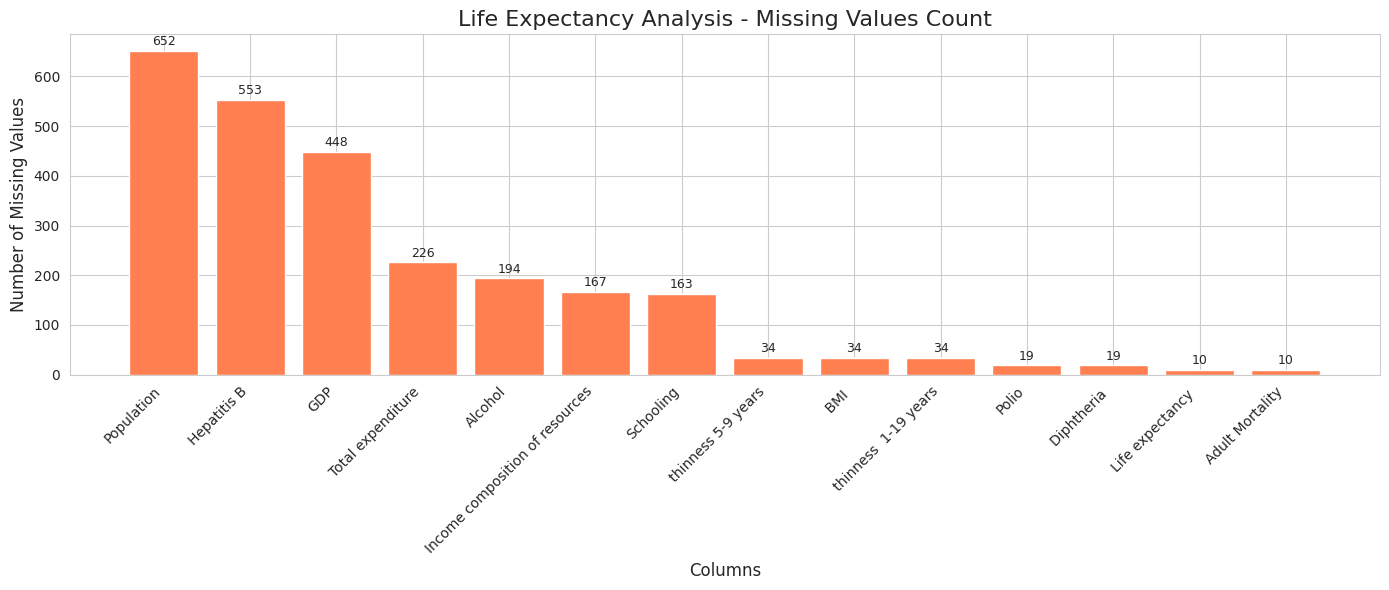


   Top 5 columns with most missing values:
      1. Population: 652 missing
      2. Hepatitis B: 553 missing
      3. GDP: 448 missing
      4. Total expenditure: 226 missing
      5. Alcohol: 194 missing

2. Finding top 10 countries by life expectancy...
   Using columns: 'Country' and 'Life expectancy '
   Collected 2928 valid country-life expectancy pairs
   Found 183 countries with life expectancy data
   Creating top countries visualization...


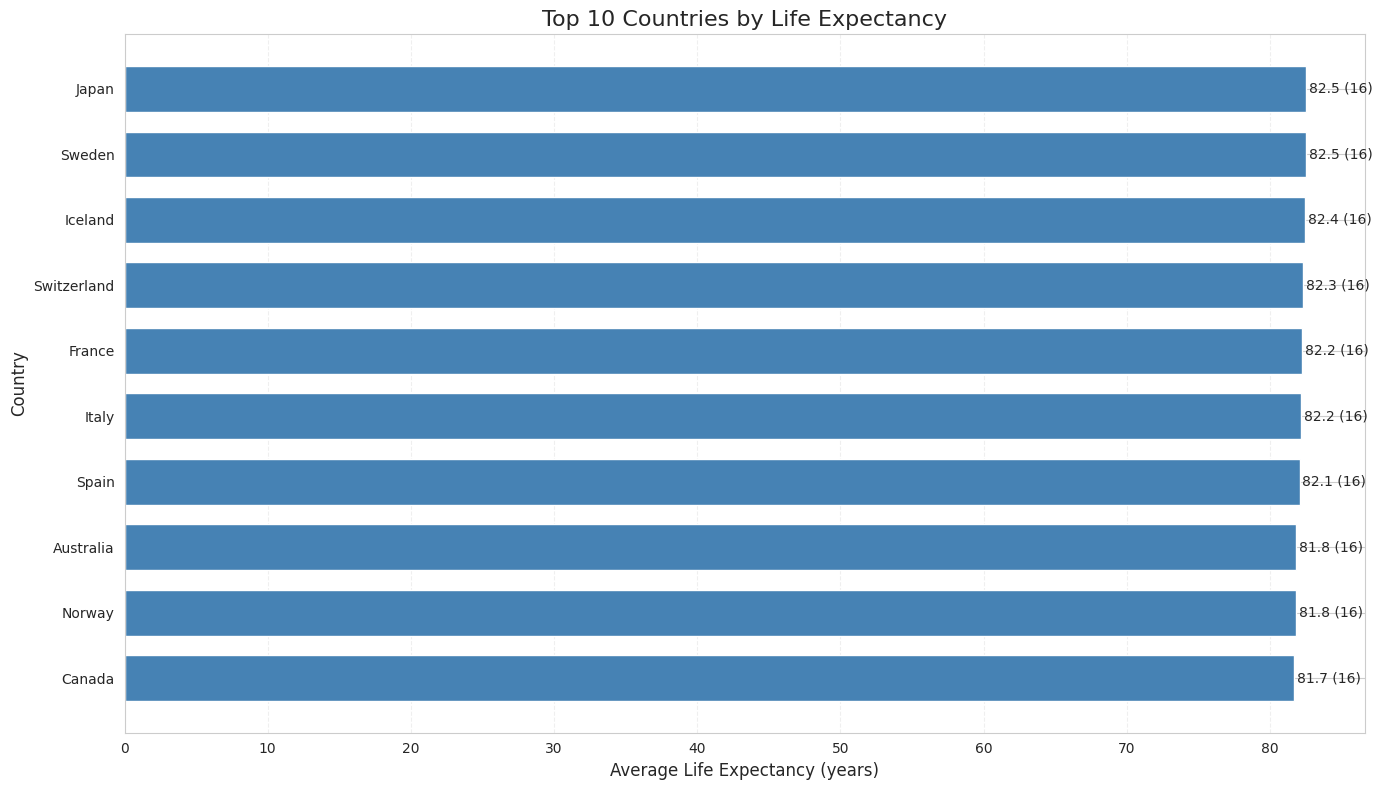


   Top 10 countries:
       1. Japan                    : 82.5 years (16 data points)
       2. Sweden                   : 82.5 years (16 data points)
       3. Iceland                  : 82.4 years (16 data points)
       4. Switzerland              : 82.3 years (16 data points)
       5. France                   : 82.2 years (16 data points)
       6. Italy                    : 82.2 years (16 data points)
       7. Spain                    : 82.1 years (16 data points)
       8. Australia                : 81.8 years (16 data points)
       9. Norway                   : 81.8 years (16 data points)
      10. Canada                   : 81.7 years (16 data points)

3. Analyzing life expectancy distribution...
   Collected 2928 life expectancy values
   Statistics:
     Mean:   69.22 years
     Median: 72.10 years
     Min:    36.30 years
     Max:    89.00 years
     Range:  52.70 years
   Creating distribution visualization...


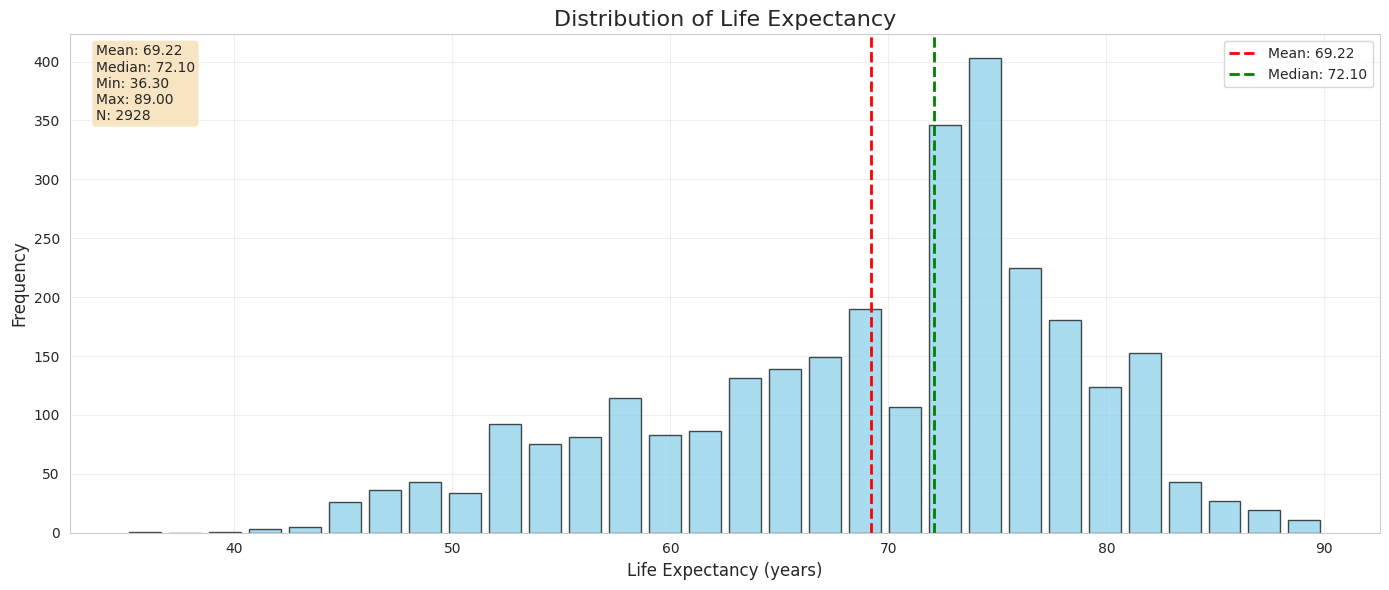


VISUALIZATION COMPLETE!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("=" * 80)
print("DATA VISUALIZATION - IMPERATIVE VERSION")
print("=" * 80)

top_n = 10
dist_column = 'Life expectancy '
title_prefix = "Life Expectancy Analysis"

# ============================================================
# 1. MISSING DATA VISUALIZATION
# ============================================================
print("\n1. Analyzing missing data...")

missing_counts = {}
for col_idx in range(len(data.columns)):
    col_name = data.columns[col_idx]
    count = 0
    for row_idx in range(len(data)):
        val = data.iat[row_idx, col_idx]
        if pd.isna(val):
            count += 1
    missing_counts[col_name] = count

sorted_items = []
for col_name, count in missing_counts.items():
    sorted_items.append((col_name, count))

for i in range(len(sorted_items)):
    for j in range(i + 1, len(sorted_items)):
        if sorted_items[j][1] > sorted_items[i][1]:
            temp = sorted_items[i]
            sorted_items[i] = sorted_items[j]
            sorted_items[j] = temp

columns_with_missing = []
counts = []
for col_name, count in sorted_items:
    if count > 0:
        columns_with_missing.append(col_name)
        counts.append(count)

print(f"   Columns with missing values: {len(columns_with_missing)}")
print(f"   Total missing values: {sum(counts)}")

if len(columns_with_missing) > 0:
    print("   Creating missing data visualization...")
    plt.figure(figsize=(14, 6))

    x_positions = []
    for i in range(len(columns_with_missing)):
        x_positions.append(i)

    for i in range(len(columns_with_missing)):
        plt.bar(x_positions[i], counts[i], color='coral', width=0.8)

    plt.title(f'{title_prefix} - Missing Values Count', fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Number of Missing Values', fontsize=12)
    plt.xticks(x_positions, columns_with_missing, rotation=45, ha='right')

    for i in range(len(columns_with_missing)):
        plt.text(x_positions[i], counts[i] + 5, str(counts[i]),
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    print("\n   Top 5 columns with most missing values:")
    for i in range(min(5, len(columns_with_missing))):
        print(f"      {i+1}. {columns_with_missing[i]}: {counts[i]} missing")
else:
    print(f"   {title_prefix}: No missing values!")

# ============================================================
# 2. TOP COUNTRIES BY LIFE EXPECTANCY
# ============================================================
print(f"\n2. Finding top {top_n} countries by life expectancy...")

has_country = False
has_life_exp = False
for col in data.columns:
    if 'country' in col.lower():
        country_col = col
        has_country = True
    if 'life expectancy' in col.lower():
        life_exp_col = col
        has_life_exp = True

if has_country and has_life_exp:
    print(f"   Using columns: '{country_col}' and '{life_exp_col}'")

    country_values = []
    country_idx = data.columns.get_loc(country_col)
    life_exp_idx = data.columns.get_loc(life_exp_col)

    for row_idx in range(len(data)):
        country = data.iat[row_idx, country_idx]
        value = data.iat[row_idx, life_exp_idx]
        if pd.notna(country) and pd.notna(value):
            try:
                country_values.append((str(country).strip(), float(value)))
            except:
                continue

    print(f"   Collected {len(country_values)} valid country-life expectancy pairs")

    agg = {}
    for country, value in country_values:
        if country in agg:
            agg[country].append(value)
        else:
            agg[country] = [value]

    country_avg = []
    for country, values in agg.items():
        total = 0.0
        count = 0
        for v in values:
            total += v
            count += 1
        if count > 0:
            country_avg.append((country, total / count, count))

    print(f"   Found {len(country_avg)} countries with life expectancy data")

    for i in range(len(country_avg)):
        for j in range(i + 1, len(country_avg)):
            if country_avg[j][1] > country_avg[i][1]:
                temp = country_avg[i]
                country_avg[i] = country_avg[j]
                country_avg[j] = temp

    top_countries = country_avg[:top_n]

    top_names = []
    top_vals = []
    top_counts = []

    for country, avg_val, count in top_countries:
        top_names.append(country)
        top_vals.append(avg_val)
        top_counts.append(count)

    print("   Creating top countries visualization...")
    plt.figure(figsize=(14, 8))

    y_positions = []
    for i in range(len(top_names)):
        y_positions.append(i)

    for i in range(len(top_names)):
        plt.barh(y_positions[i], top_vals[i], color='steelblue', height=0.7)

    plt.xlabel('Average Life Expectancy (years)', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.title(f'Top {top_n} Countries by Life Expectancy', fontsize=16)
    plt.yticks(y_positions, top_names)
    plt.gca().invert_yaxis()

    for i in range(len(top_names)):
        plt.text(top_vals[i] + 0.2, y_positions[i],
                f'{top_vals[i]:.1f} ({top_counts[i]})',
                va='center', fontsize=10)

    plt.grid(axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\n   Top {top_n} countries:")
    for i, (country, avg_val, count) in enumerate(top_countries, 1):
        print(f"      {i:2d}. {country:25s}: {avg_val:.1f} years ({count} data points)")
else:
    print("   Required columns not found for top countries analysis")

# ============================================================
# 3. LIFE EXPECTANCY DISTRIBUTION
# ============================================================
print(f"\n3. Analyzing life expectancy distribution...")

if has_life_exp:
    values = []
    life_exp_idx = data.columns.get_loc(life_exp_col)

    for row_idx in range(len(data)):
        val = data.iat[row_idx, life_exp_idx]
        if pd.notna(val):
            try:
                values.append(float(val))
            except:
                continue

    print(f"   Collected {len(values)} life expectancy values")

    if values:
        # Mean
        total = 0.0
        for v in values:
            total += v
        mean_val = total / len(values)

        # Median
        sorted_vals = sorted(values)
        n = len(sorted_vals)
        if n % 2 == 1:
            median_val = sorted_vals[n // 2]
        else:
            median_val = (sorted_vals[n // 2 - 1] + sorted_vals[n // 2]) / 2

        # Min and Max
        min_val = values[0]
        max_val = values[0]
        for v in values:
            if v < min_val:
                min_val = v
            if v > max_val:
                max_val = v

        print(f"   Statistics:")
        print(f"     Mean:   {mean_val:.2f} years")
        print(f"     Median: {median_val:.2f} years")
        print(f"     Min:    {min_val:.2f} years")
        print(f"     Max:    {max_val:.2f} years")
        print(f"     Range:  {max_val - min_val:.2f} years")

        print("   Creating distribution visualization...")
        plt.figure(figsize=(14, 6))

        bin_min = int(min_val) - 1
        bin_max = int(max_val) + 1
        num_bins = 30
        bin_width = (bin_max - bin_min) / num_bins

        bins = []
        for i in range(num_bins + 1):
            bins.append(bin_min + i * bin_width)

        bin_counts = [0] * num_bins
        for v in values:
            for i in range(num_bins):
                if bins[i] <= v < bins[i + 1]:
                    bin_counts[i] += 1
                    break

        bin_centers = []
        for i in range(num_bins):
            bin_centers.append((bins[i] + bins[i + 1]) / 2)

        plt.bar(bin_centers, bin_counts, width=bin_width * 0.8,
                color='skyblue', edgecolor='black', alpha=0.7)

        plt.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='--', linewidth=2,
                   label=f'Median: {median_val:.2f}')

        plt.title(f'Distribution of Life Expectancy', fontsize=16)
        plt.xlabel('Life Expectancy (years)', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)

        stats_text = f'Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\nMin: {min_val:.2f}\nMax: {max_val:.2f}\nN: {len(values)}'
        plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

        plt.tight_layout()
        plt.show()
else:
    print("   Life expectancy column not found")

print("\n" + "=" * 80)
print("VISUALIZATION COMPLETE!")
print("=" * 80)

In [ ]:
# --------------------------
# 8. SAVE CLEANED DATA TO CSV (FULLY IMPERATIVE)
# --------------------------
output_file = "cleaned_data.csv"

f = open(output_file, "w", encoding="utf-8")

header = ""
for col_idx in range(len(X.columns)):
    header += X.columns[col_idx]
    if col_idx != len(X.columns) - 1:
        header += ","
f.write(header + "\n")

for row_idx in range(len(X)):
    row_str = ""
    for col_idx in range(len(X.columns)):
        val = X.iat[row_idx, col_idx]
        row_str += str(val)
        if col_idx != len(X.columns) - 1:
            row_str += ","
    f.write(row_str + "\n")

f.close()
print(f"Cleaned data saved to {output_file}")


Cleaned data saved to cleaned_data.csv
